In [90]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [91]:
G2 = 1
Fr2 = 0.01
N = np.linspace(0.01,0.99,10000)

In [92]:
#solve for E
sol = np.empty(len(N))

for i in range(len(N)):
    coeff = [(1/N[i]**3)+1/(1-N[i])**3, -2/(1-N[i])**3, 1/(1-N[i])**3, -G2/Fr2]
    sol[i] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]

<ipython-input-92-af99b714f4d0>:6: ComplexWarning: Casting complex values to real discards the imaginary part
  sol[i] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]


In [94]:
Emax = max(sol)
print(Emax)

#solve for variation in G2 over N now that we have Emax
G2 = [Fr2*((Emax**3)/(n**3) + (Emax*(Emax-1)**2)/(1-n)**3) for n in N]

2.216451949806241


In [ ]:
plt.figure(figsize=(8,5))
plt.plot(N,G2)
plt.plot([0,1],[1,1],'k--')
plt.ylim(-1,30)
plt.xlim(0,1)
plt.ylabel('G$^2$', fontsize=16)
plt.xlabel('$\eta$', fontsize=16)

### Question 3

In [56]:
Fr2 = np.linspace(0.0001,0.9,1000)
N = np.linspace(0.01,0.99, 1000)
sol = np.empty(len(N))
G2 = 1
Emax = np.empty(len(Fr2))
Nmax = np.empty(len(Fr2))

for j in range(len(Fr2)):
    for i in range(len(N)):
        coeff = [(1/N[i]**3)+1/(1-N[i])**3, -2/(1-N[i])**3, 1/(1-N[i])**3, -G2/Fr2[j]]
        sol[i] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]
    Emax[j] = max(sol)
    Nmax[j] = N[np.where(sol==max(sol))]

<ipython-input-56-031cebd049c2>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  sol[i] = np.roots(coeff)[np.isreal(np.roots(coeff))][0]


(0.5, 1.0)

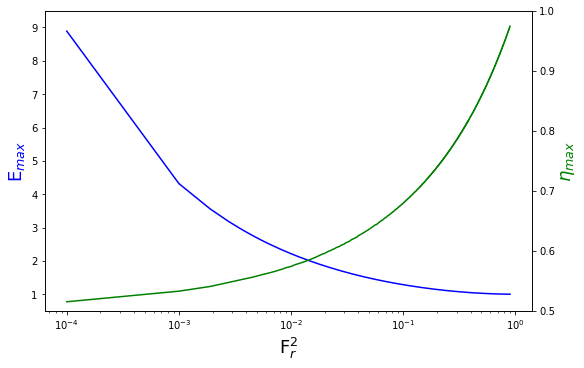

In [81]:
fig, ax = plt.subplots(constrained_layout=True,figsize=(8,5))
ax.plot(Fr2, Emax,'b')
ax.set_xlabel('F$_r^{2}$', fontsize = 18)
ax.set_ylabel('E$_{max}$', fontsize = 18, color='blue')
ax.set_xscale('log')
ax.set_ylim(0.5,9.5)

ax2 = ax.twinx()
ax2.plot(Fr2, Nmax, 'g')
ax2.set_ylabel('$\eta_{max}$', fontsize = 18, color='green')
ax2.set_ylim(0.5,1)